### Classification using Keras 
Note: Keras uses TensorFlow by default. You can switch backend to Theano (see https://keras.io/backend/ for details)

In [653]:
import keras 
keras.__version__

'2.0.4'

In [654]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, log_loss, classification_report
from sklearn.metrics import confusion_matrix , mean_squared_error, r2_score
from sklearn.datasets import load_iris, load_boston

# Import `Sequential` from `keras.models`
from keras.models import Sequential
# Import `Dense` from `keras.layers`
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD, RMSprop, Adam

iris = load_iris()
X = iris.data
y = iris.target 
X = X.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = 0.7, random_state=707)

nb_classes = len(set(y_train))
print(nb_classes, 'classes')

dims = X_train.shape[1]
print(dims, 'dims')#

y_test_c = y_test
# Convert labels to categorical one-hot encoding (there is also a sklear wrapper)
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)

3 classes
4 dims


In [655]:
#### https://keras.io/getting-started/sequential-model-guide/
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=dims))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_363 (Dense)            (None, 100)               500       
_________________________________________________________________
dense_364 (Dense)            (None, 3)                 303       
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [656]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1) 
Result = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=50, 
          batch_size=15, verbose=True, callbacks=[early_stop]) #callbacks=[best_model, early_stop]

Train on 105 samples, validate on 45 samples
Epoch 1/50
105/105 [==============================] - 1s - loss: 1.2700 - acc: 0.3810 - val_loss: 1.0270 - val_acc: 0.6667
Epoch 2/50
105/105 [==============================] - 0s - loss: 0.9802 - acc: 0.6381 - val_loss: 0.9081 - val_acc: 0.6667
Epoch 3/50
105/105 [==============================] - 0s - loss: 0.8833 - acc: 0.6667 - val_loss: 0.8385 - val_acc: 0.6667
Epoch 4/50
105/105 [==============================] - 0s - loss: 0.8281 - acc: 0.6571 - val_loss: 0.7875 - val_acc: 0.6667
Epoch 5/50
105/105 [==============================] - 0s - loss: 0.7667 - acc: 0.6762 - val_loss: 0.7466 - val_acc: 0.7111
Epoch 6/50
105/105 [==============================] - 0s - loss: 0.7262 - acc: 0.7048 - val_loss: 0.6980 - val_acc: 0.6667
Epoch 7/50
105/105 [==============================] - 0s - loss: 0.6962 - acc: 0.7048 - val_loss: 0.6643 - val_acc: 0.6667
Epoch 8/50
105/105 [==============================] - 0s - loss: 0.6562 - acc: 0.7048 - val_lo

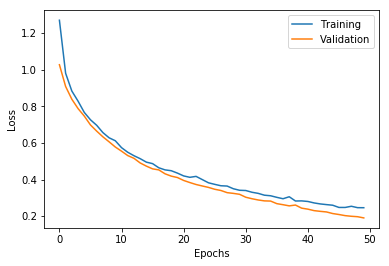

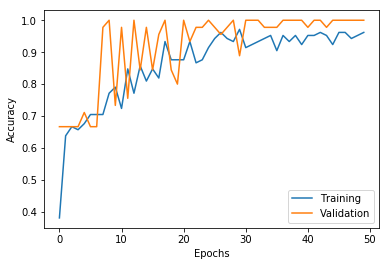

In [657]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(Result.history['loss'])
plt.plot(Result.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(Result.history['acc'])
plt.plot(Result.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [658]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print("\n score: ",score)

32/45 [====================>.........] - ETA: 0s
 score:  [0.19020041459136539, 1.0]


In [659]:
y_pred_c = model.predict_classes(X_test)
# Confusion matrix
confusion_matrix(y_test_c, y_pred_c)

32/45 [====================>.........] - ETA: 0s

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]])

In [660]:
# Precision 
#precision_score(y_test, y_pred)
log_loss(y_test, y_pred)

0.1902004086929891

In [661]:
y_pred_c[:10]

array([2, 1, 2, 0, 0, 1, 2, 0, 1, 2], dtype=int64)

In [662]:
y_pred[:10]

array([[  5.21784859e-05,   1.93580702e-01,   8.06367099e-01],
       [  6.05266448e-03,   7.97284126e-01,   1.96663260e-01],
       [  1.34400660e-04,   3.22120309e-01,   6.77745283e-01],
       [  9.91758406e-01,   8.20064638e-03,   4.09144413e-05],
       [  9.93722856e-01,   6.25763787e-03,   1.95137982e-05],
       [  3.01304050e-02,   8.14757049e-01,   1.55112579e-01],
       [  1.21510329e-05,   1.27031967e-01,   8.72955918e-01],
       [  9.85171497e-01,   1.47529300e-02,   7.55901856e-05],
       [  4.32500942e-03,   7.70483077e-01,   2.25191981e-01],
       [  1.46794860e-04,   3.19045871e-01,   6.80807292e-01]], dtype=float32)

### Regression example in Keras

In [663]:
from sklearn.datasets import load_boston 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, mean_squared_error
boston = load_boston()
Xb, yb = shuffle(boston.data, boston.target, random_state=13)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, train_size=0.751, random_state=717)
scalerS = StandardScaler()
scalerM = MinMaxScaler()
scalerS.fit(Xb_train)
Xb_train = scalerS.transform(Xb_train)
Xb_test = scalerS.transform(Xb_test)

In [664]:
boston.data.shape
scalerM

MinMaxScaler(copy=True, feature_range=(0, 1))

In [665]:
modelb = Sequential()
modelb.add(Dense(52, input_dim=13, activation='relu'))
modelb.add(Dense(26, activation='relu'))
modelb.add(Dense(1, activation='linear'))
# Compile model
modelb.compile(loss='mean_squared_error', optimizer='rmsprop')
modelb.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_365 (Dense)            (None, 52)                728       
_________________________________________________________________
dense_366 (Dense)            (None, 26)                1378      
_________________________________________________________________
dense_367 (Dense)            (None, 1)                 27        
Total params: 2,133
Trainable params: 2,133
Non-trainable params: 0
_________________________________________________________________


In [666]:
early_stopb = EarlyStopping(monitor='val_loss', patience=5, verbose=1) 
Resultb = modelb.fit(Xb_train, yb_train, validation_data = (Xb_test, yb_test), epochs=200, 
          batch_size=76, verbose=True, callbacks=[early_stopb])

Train on 380 samples, validate on 126 samples
Epoch 1/200
380/380 [==============================] - 1s - loss: 544.4865 - val_loss: 576.3575
Epoch 2/200
380/380 [==============================] - 0s - loss: 514.7952 - val_loss: 547.5043
Epoch 3/200
380/380 [==============================] - 0s - loss: 489.3269 - val_loss: 519.6476
Epoch 4/200
380/380 [==============================] - 0s - loss: 464.5426 - val_loss: 491.8042
Epoch 5/200
380/380 [==============================] - 0s - loss: 439.2039 - val_loss: 463.6501
Epoch 6/200
380/380 [==============================] - 0s - loss: 413.2381 - val_loss: 434.5330
Epoch 7/200
380/380 [==============================] - 0s - loss: 386.3220 - val_loss: 404.2145
Epoch 8/200
380/380 [==============================] - 0s - loss: 358.9595 - val_loss: 373.7110
Epoch 9/200
380/380 [==============================] - 0s - loss: 331.4310 - val_loss: 342.9657
Epoch 10/200
380/380 [==============================] - 0s - loss: 303.9267 - val_loss: 31

380/380 [==============================] - 0s - loss: 10.7601 - val_loss: 10.1649
Epoch 87/200
380/380 [==============================] - 0s - loss: 10.6600 - val_loss: 9.6818
Epoch 88/200
380/380 [==============================] - 0s - loss: 10.6763 - val_loss: 9.6185
Epoch 89/200
380/380 [==============================] - 0s - loss: 10.5096 - val_loss: 9.9138
Epoch 90/200
380/380 [==============================] - 0s - loss: 10.4854 - val_loss: 9.9138
Epoch 91/200
380/380 [==============================] - 0s - loss: 10.4149 - val_loss: 9.6205
Epoch 92/200
380/380 [==============================] - 0s - loss: 10.3851 - val_loss: 9.8830
Epoch 93/200
380/380 [==============================] - 0s - loss: 10.2627 - val_loss: 9.5707
Epoch 94/200
380/380 [==============================] - 0s - loss: 10.3178 - val_loss: 9.6948
Epoch 95/200
380/380 [==============================] - 0s - loss: 10.2434 - val_loss: 9.7630
Epoch 96/200
380/380 [==============================] - 0s - loss: 10.10

In [667]:
#[item for item in Resultb.history], [item for item in Result.history]

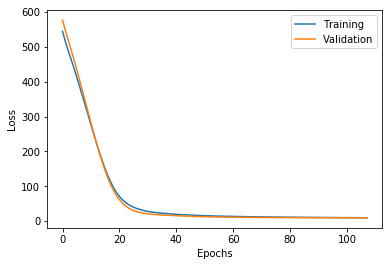

In [668]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(Resultb.history['loss'])
plt.plot(Resultb.history['val_loss'])
plt.legend(['Training', 'Validation'])

In [669]:
yb_predicted = modelb.predict(Xb_test)
score = mean_squared_error(yb_predicted, yb_test)
Rsq = r2_score(yb_test, yb_predicted)
print('MSE: {0:f}'.format(score))
print('RMSE: {0:f}'.format(score**0.5))
print('R^2: {0:f}'.format(Rsq))


MSE: 9.330693
RMSE: 3.054618
R^2: 0.889260


In [671]:
yb_predicted[:10]

array([[ 11.51678944],
       [ 33.99082947],
       [ 22.6405468 ],
       [ 28.96929169],
       [ 21.90566635],
       [ 31.74049377],
       [ 22.77473831],
       [ 18.49347496],
       [ 33.55136108],
       [ 22.15528488]], dtype=float32)

In [670]:
yb_test[:10]

array([ 14.9,  31.7,  22.5,  30.7,  20.3,  27. ,  23. ,  18.6,  34.9,  21. ])